## Probability Mass Functions

*Coding along with third edition of the online version of __[Think Stats](https://allendowney.github.io/ThinkStats/chap03.html)__ by Allen Downey.*

In this chapter we'll introduce a probability mass function (PMF) to describe a distribution. A PMF contains a set of quantities and their probabilities.

A __probability mass function (PMF)__ describes the probability of each possible value occurring in a discrete random variable.

Key characteristics:
- Only applies to discrete variables (countable values like dice rolls, number of children)
- For each possible value x, PMF(x) gives its probability of occurring
- All probabilities must be between 0 and 1
- Sum of all probabilities must equal 1

For example, for a fair six-sided die:
- PMF(1) = 1/6
- PMF(2) = 1/6
- And so on for each value
- No probability for values like 1.5 or 7
- Total probability = 1/6 + 1/6 + ... + 1/6 = 1

This __differs from probability density functions (PDFs)__ which are used for continuous variables where individual point probabilities are zero.

*(Source: Claude.ai)*

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate
from empiricaldist import Hist
from empiricaldist import Pmf

## PMFs

A Pmf object is like a Hist that contains probabilities instead of frequencies. 

In [32]:
# creating a Pmf is from a Hist
# here's a Hist example that represents the distribution of values in a short sequence
hist = Hist.from_seq([1, 2, 2, 3, 5])
hist

,freqs
1,1
2,2
3,1
5,1


In [33]:
# the sum of the frequencies is the size of the original sequence
n = hist.sum()
n

np.int64(5)

In [34]:
# dividing the frequencies by n
pmf = hist / n
# now we have proportions (props) rather than counts
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


The proportions we're getting i.e. indicate that 20% of the values in the sequence are 1 and 40% are 2.

If we think of these proportions as probabilities then the probability that we we choose the value 1 is 0.2 and the probability that we choose the value 2 is 0.4.

If we choose a random value from the original sequence, the probability we choose the value 1 is 0.2, and so on.

*The sum of the probabilities is 1 which means that this distribution is __normalized__*.

A normalized `Hist` object represents a **probability mass function** (PMF). The name indicates that probabilities associated with discrete quantities are also called "probability masses".

In [35]:
# create a `Pmf` object directly with the `empiricaldist` library's `Pmf` functionality
pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [36]:
# the Pmf is normalized so the total probability is 1
pmf.sum()

np.float64(1.0)

In [37]:
# using the bracket operator to look up the probability associated with a value
pmf[2]

np.float64(0.4)

In [38]:
# assigning a probability to a quantity
pmf[2] = 0.2
pmf(2)

np.float64(0.2)

In [39]:
# modifying an existing Pmf by incrementing the probability associated with a value
pmf[2] += 0.3
pmf[2]

np.float64(0.5)

In [40]:
# multiplying a probability by a factor
pmf[2] *= 0.5
pmf[2]

np.float64(0.25)

In [41]:
# when modifying a `Pmf` the result may not be normalized
pmf.sum()

np.float64(0.8500000000000001)

In [42]:
# getting the pmf back on track with the `normalize` method 
# it "renormalizes" the `Pmf` by dividing through by the sum
pmf.normalize()

np.float64(0.8500000000000001)

In [43]:
pmf # let's check it

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


In [44]:
pmf.sum() # let's check the sum, should be 1.0 again

np.float64(1.0)

In [45]:
# make a copy to modify it without affecting the original
pmf.copy()

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


In [46]:
# a `Pmf` object has a `qs` attribute that accesses the quantities
pmf.qs

array([1, 2, 3, 5])

In [47]:
# a `Pmf` object has a `ps` attribute that accesses the probabilities
pmf.ps

array([0.23529412, 0.29411765, 0.23529412, 0.23529412])

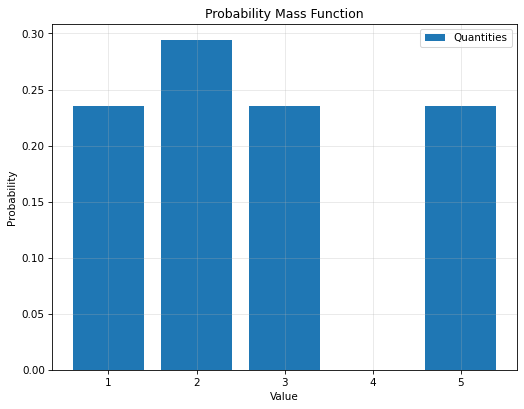

In [48]:
# how to use the bar method according to claude.ai
plt.figure(figsize=(8, 6))
pmf.bar(label='Quantities')
plt.title('Probability Mass Function')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

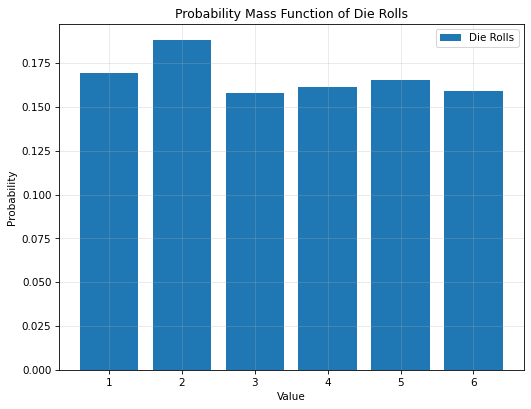

In [49]:
# another example that simulates rolling a fair six-sided die 1000 times
# create sample data - let's simulate rolling a die 1000 times
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=1000)

# create Pmf object from the data
pmf = Pmf.from_seq(rolls)

# create the bar plot
plt.figure(figsize=(8, 6))
pmf.bar(label='Die Rolls')

# customize the plot
plt.title('Probability Mass Function of Die Rolls')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

## Summary Statistics

In [51]:
# computing the mean of a sample by adding up the elements and dividing by n
seq = [1, 2, 2, 3, 5]
mean = np.sum(seq) / len(seq)
mean

np.float64(2.6)

In [52]:
# computing the PMF of the values in the sequence
pmf = Pmf.from_seq(seq)
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [53]:
# computing the mean from the pmf 
# process is different: we have to multiply the probabilities and quantities and add up the products
mean = np.sum(pmf.ps * pmf.qs)
mean

np.float64(2.6)

__We don't have to divide by n because we already did that when we normalized the Pmf.__

In [54]:
# pmf objects have a mean method that does the same thing
pmf.mean()

np.float64(2.6)

In [55]:
# computing the variance by (1) computing the deviation of each quantity from the mean
deviations = pmf.qs - mean
deviations

array([-1.6, -0.6,  0.4,  2.4])

In [57]:
# (2) then multiplying the squared deviations by the probabilities and add up the products
var = np.sum(pmf.ps * deviations**2)
var

np.float64(1.84)

In [60]:
# same with pmf.var()
pmf.var()

np.float64(1.84)

In [58]:
# computing the standard deviation from the variance
std = np.sqrt(var)
std

np.float64(1.3564659966250536)

In [61]:
# same with pmf.std()
pmf.std()

np.float64(1.3564659966250536)

In [62]:
# finding the value with the highest probability with the mode method
pmf.mode()

np.int64(2)